## Climate Data Time-Series

Location: Weather Station, Max Planck Institute for Biogeochemistry in Jena, Germany
Time-frame: Jan 10, 2009 - December 31, 2017

Index  |   Features         |   Format                |   Description
-------|--------------------|-------------------------|-----------------------
1      |   Date Time        |   01.01.2009 00:10:00   |   Date-time reference
2      |   p (mbar)         |   996.52                |   The pascal SI derived unit of pressure used to quantify internal pressure. Meteorological reports typically state atmospheric pressure in millibars.
3      |   T (degC)         |   -8.02                 |   Temperature in Celsius
4      |   Tpot (K)         |   265.4                 |   Temperature in Kelvin
5      |   Tdew (degC)      |   -8.9                  |   Temperature in Celsius relative to humidity. Dew Point is a measure of the absolute amount of water in the air, the DP is the temperature at which the air cannot hold all the moisture in it and water condenses. 
6      |   rh (%)           |   93.3                  |   Relative Humidity is a measure of how saturated the air is with water vapor, the %RH determines the amount of water contained within collection objects. 
7      |   VPmax (mbar)     |   3.33                  |   Saturation vapor pressure
8      |   VPact (mbar)     |   3.11                  |   Vapor pressure
9      |   VPdef (mbar)     |   0.22                  |   Vapor pressure deficit
10     |   sh (g/kg)        |   1.94                  |   Specific humidity
11     |   H2OC (mmol/mol)  |   3.12                  |   Water vapor concentration
12     |   rho (g/m ** 3)   |   1307.75               |   Airtight
13     |   wv (m/s)         |   1.03                  |   Wind speed 
14     |   max. wv (m/s)    |   1.75                  |   Maximum wind speed
15     |   wd (deg)         |   152.3                 |   Wind direction in degrees  


In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
import keras as K
SEED_VALUE = 10

tf.random.set_seed(SEED_VALUE)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 119533158011518214
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12467953317137945365
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15580237041053493743
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6894886592
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18350576160955047338
physical_device_desc: "device: 0, name: GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [13]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.5
tf.compat.v1.Session(config=config)

In [14]:
csv_path = './jena_climate_2009_2016.csv'
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


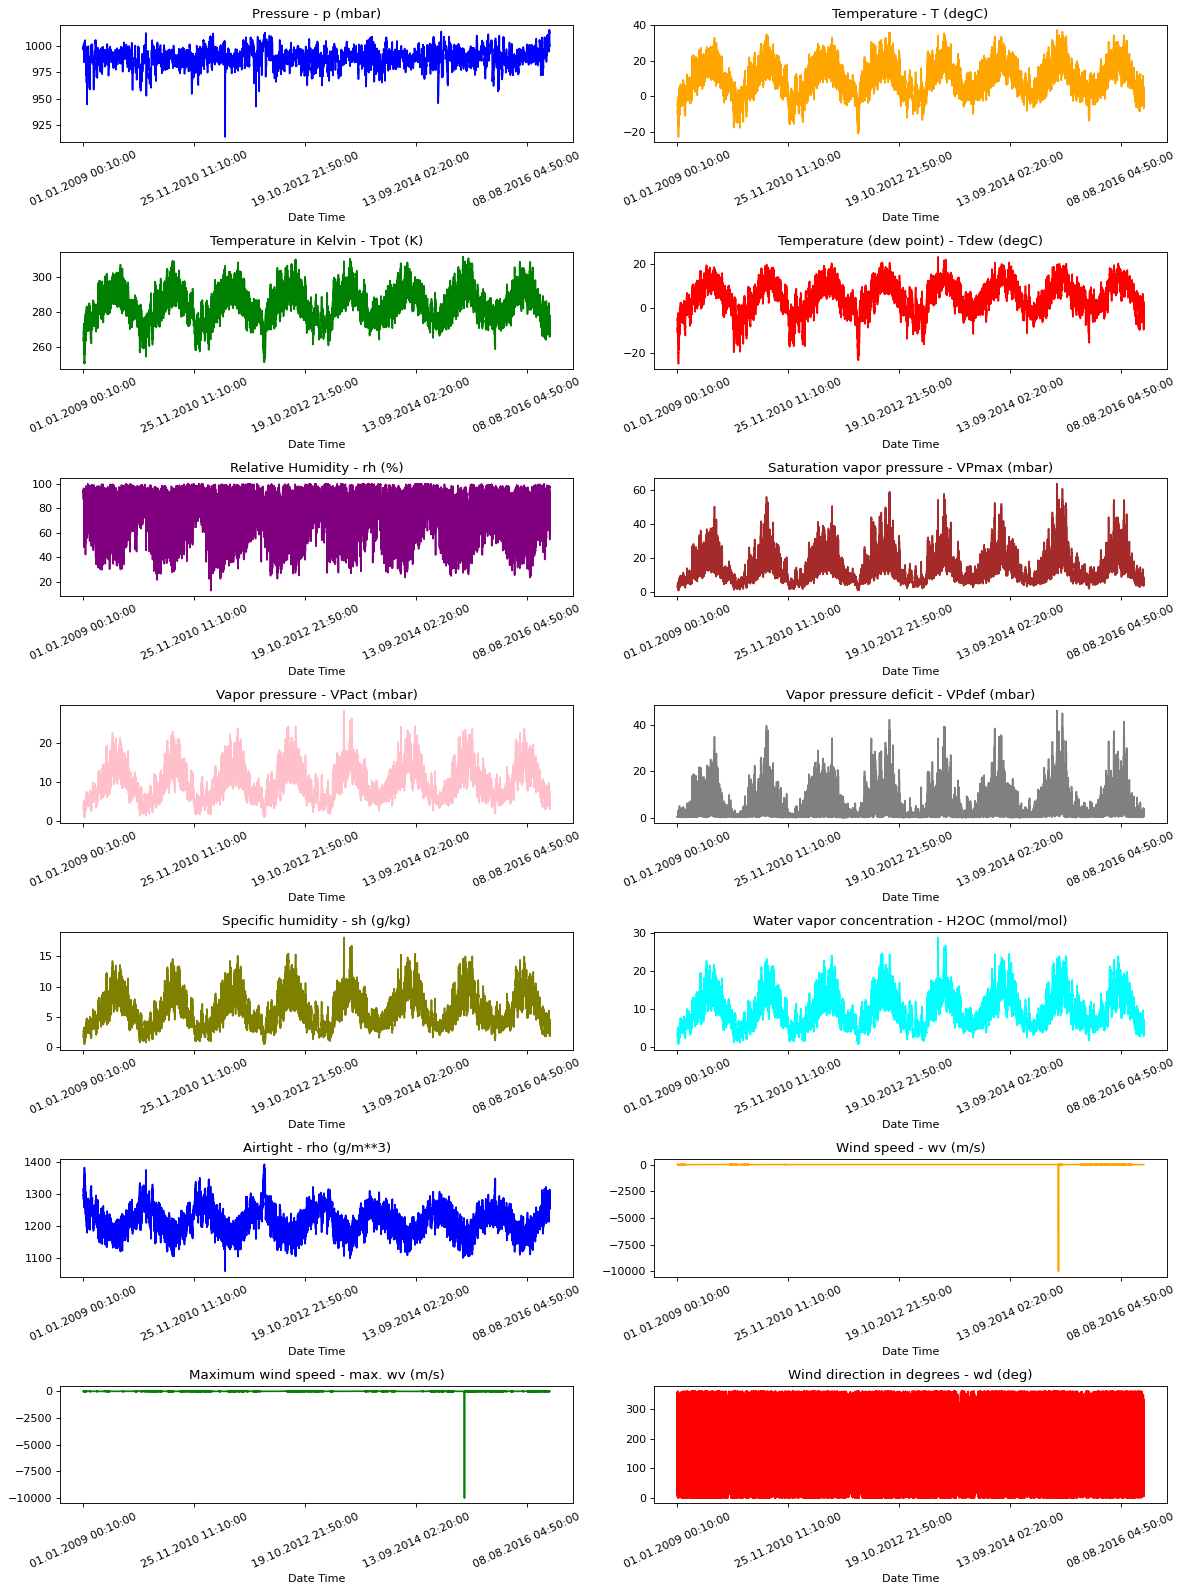

In [15]:

titles = ['Pressure', "Temperature", "Temperature in Kelvin", "Temperature (dew point)", "Relative Humidity", "Saturation vapor pressure", "Vapor pressure", "Vapor pressure deficit", "Specific humidity", "Water vapor concentration", "Airtight", "Wind speed", "Maximum wind speed", "Wind direction in degrees"]
head_keys = ["p (mbar)", "T (degC)", "Tpot (K)", "Tdew (degC)", "rh (%)", "VPmax (mbar)", "VPact (mbar)", "VPdef (mbar)", "sh (g/kg)", "H2OC (mmol/mol)", "rho (g/m**3)", "wv (m/s)", "max. wv (m/s)", "wd (deg)"]
time_data = df['Date Time']

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

fig, axes = plt.subplots(nrows=7, ncols=2,figsize=(15,20), dpi=80, facecolor='w', edgecolor='k')

for i in range(len(head_keys)):
    key = head_keys[i]
    c = colors[i% (len(colors))]
    #print(i // 2, i % 2)
    t_data = df[key]
    t_data.index = time_data
    t_data.head()
    t_data.plot(ax=axes[i // 2, i % 2], color=c, title='{} - {}'.format(titles[i], key), rot=25)

plt.tight_layout()


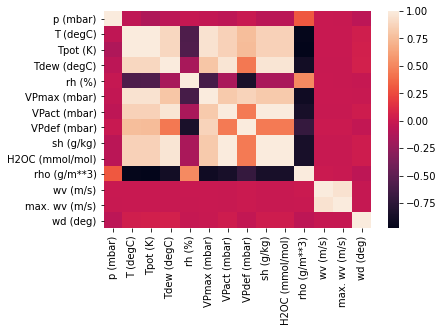

In [16]:
corr=df.corr()
sns.heatmap(corr)

## Min-Max Feature Scaling Normalization
#### Due to the different units of measure in the dataset, this data will need normalized to get all values between 0 and 1. The below cell normalizes the data using min-max normalization.

In [22]:
import numpy as np 
import pandas as pd 

csv_path = './jena_climate_2009_2016.csv'

#this will avoid using the time column
df = pd.read_csv(csv_path, sep=",", usecols=["p (mbar)", "T (degC)", "Tpot (K)", "Tdew (degC)", "rh (%)", "VPmax (mbar)", "VPact (mbar)", 
                                             "VPdef (mbar)", "sh (g/kg)", "H2OC (mmol/mol)", "rho (g/m**3)", "wv (m/s)", "max. wv (m/s)", "wd (deg)"])

normalized_df = (df-df.min()) / (df.max()-df.min())
print(normalized_df.head())
print(normalized_df.describe())

df = pd.read_csv(csv_path)

   p (mbar)  T (degC)  Tpot (K)  Tdew (degC)    rh (%)  VPmax (mbar)  \
0  0.814939  0.248632  0.243662     0.334788  0.923033      0.037886   
1  0.815430  0.242163  0.237241     0.326891  0.924182      0.036294   
2  0.815037  0.240504  0.235594     0.326268  0.929925      0.035976   
3  0.814840  0.243822  0.239052     0.331255  0.933372      0.036772   
4  0.814840  0.244485  0.239546     0.331879  0.932223      0.036931   

   VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
0      0.084272      0.004782   0.081679         0.082798      0.743213   
1      0.081003      0.004564   0.078843         0.079586      0.749349   
2      0.080639      0.004347   0.078276         0.079229      0.750666   
3      0.082819      0.004130   0.080545         0.081370      0.747523   
4      0.083182      0.004130   0.080545         0.081727      0.746954   

   wv (m/s)  max. wv (m/s)  wd (deg)  
0  0.997262       0.997830  0.423056  
1  0.997231       0.997805  0.378056  

In [23]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [24]:
df2=df.copy()
df2['Date Time']=pd.to_datetime(df2['Date Time'])
df2.index=df2['Date Time']

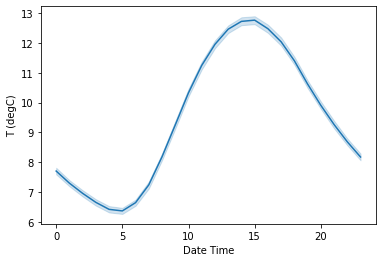

In [25]:
sns.lineplot(x=df2.index.hour,y=df2['T (degC)'])


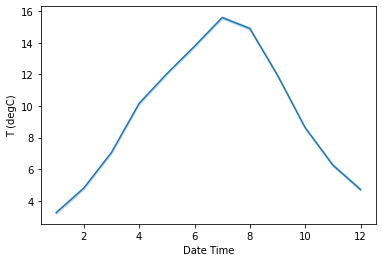

In [26]:
sns.lineplot(x=df2.index.month,y=df2['T (degC)'])

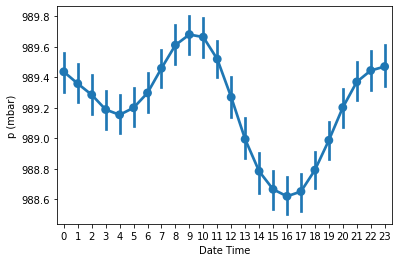

In [27]:
sns.pointplot(x=df2.index.hour, y=df2['p (mbar)'])

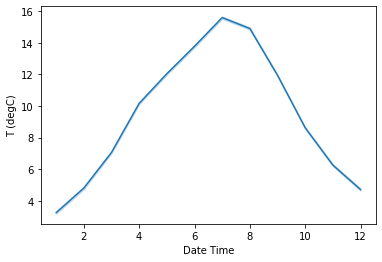

In [28]:
sns.lineplot(x=df2.index.month,y=df2['T (degC)'])

(-20.0, 40.0)

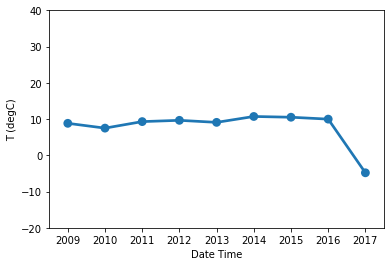

In [29]:
sns.pointplot(x=df2.index.year,y=df2['T (degC)'])
axes = plt.gca()
# axes.set_xlim([xmin,xmax])

axes.set_ylim([-20,40])

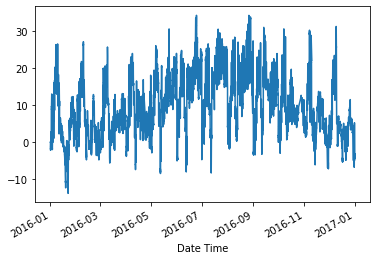

In [30]:
df2['T (degC)']['2016':].plot()

# Training and LSTM section

In [31]:
df['Date Time']=pd.to_datetime(df['Date Time'])
df.index=df['Date Time']
df.drop(columns='Date Time',inplace=True)
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [32]:
target_names = ['p (mbar)',	'T (degC)',	'sh (g/kg)'] #3 features for now

In [33]:
#Predicting the values for 1 week
shift_days=7
obs_per_hour=6
shift_steps=shift_days*obs_per_hour*24

In [34]:
df_targets=df[target_names].shift(-shift_steps)

In [35]:
df_targets.head()

,p (mbar),T (degC),sh (g/kg)
Date Time,,,
2009-01-01 00:10:00,998.67,-10.60,1.56
2009-01-01 00:20:00,998.71,-10.72,1.53
2009-01-01 00:30:00,998.83,-11.29,1.45
2009-01-01 00:40:00,998.96,-11.81,1.38
2009-01-01 00:50:00,999.04,-11.78,1.40


In [36]:
df[target_names].head(shift_steps+5)

,p (mbar),T (degC),sh (g/kg)
Date Time,,,
2009-01-01 00:10:00,996.52,-8.02,1.94
2009-01-01 00:20:00,996.57,-8.41,1.89
2009-01-01 00:30:00,996.53,-8.51,1.88
2009-01-01 00:40:00,996.51,-8.31,1.92
2009-01-01 00:50:00,996.51,-8.27,1.92
...,...,...,...
2009-08-01 00:10:00,998.67,-10.60,1.56
2009-08-01 00:20:00,998.71,-10.72,1.53
2009-08-01 00:30:00,998.83,-11.29,1.45


In [37]:
df_targets.shape, df.shape

((420551, 3), (420551, 14))

In [38]:
df_targets.tail()

,p (mbar),T (degC),sh (g/kg)
Date Time,,,
2016-12-31 23:20:00,NaN,NaN,NaN
2016-12-31 23:30:00,NaN,NaN,NaN
2016-12-31 23:40:00,NaN,NaN,NaN
2016-12-31 23:50:00,NaN,NaN,NaN
2017-01-01 00:00:00,NaN,NaN,NaN


In [39]:
x_data=df.values[:-shift_steps]
x_data.shape

(419543, 14)

In [40]:
y_data=df_targets[:-shift_steps]
y_data.shape

(419543, 3)

In [41]:
train_split = 0.9
num_data=len(x_data)
num_train = int(train_split * num_data)
num_test = num_data - num_train

In [42]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

419543

In [43]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

419543

# Scaling 

In [44]:
from sklearn.preprocessing import RobustScaler


In [45]:
scaler_x=RobustScaler()
x_train_scaled=scaler_x.fit_transform(x_train)
x_test_scaled=scaler_x.transform(x_test)

In [46]:
scaler_y=RobustScaler()
y_train_scaled=scaler_y.fit_transform(y_train)
y_test_scaled=scaler_y.transform(y_test)

In [47]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)


(377588, 14)
(377588, 3)


In [48]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_features)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_features)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)
        


In [49]:
batch_size = 64
num_x_features=x_data.shape[1]
num_y_features=y_data.shape[1]

In [50]:
sequence_length=6*24*7

In [51]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [52]:
x_batch, y_batch = next(generator)

In [53]:
print(x_batch.shape)
print(y_batch.shape)

(64, 1008, 14)
(64, 1008, 3)


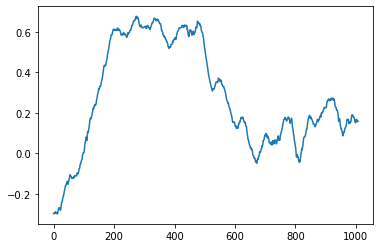

In [54]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)


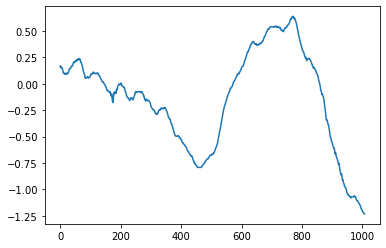

In [55]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [56]:

validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [57]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
from keras.activations import relu, softmax
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, TensorBoard

In [58]:
model=Sequential()
model.add(LSTM(units=512, return_sequences=True,input_shape=(None,num_x_features,)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=3,activation='softmax'))

AttributeError: module 'tensorflow.python.framework.ops' has no attribute '_TensorLike'

In [ ]:
optimizer = RMSprop(lr=1e-3)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [ ]:
model.summary()

In [ ]:

path_checkpoint = 'model_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [59]:

%%time
history=model.fit(x=generator,
          epochs=25,
          steps_per_epoch=50,
          validation_data=validation_data,
          callbacks=callbacks)


NameError: name 'callbacks' is not defined

In [60]:
#load checkpoint
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

Error trying to load checkpoint.
name 'path_checkpoint' is not defined


In [61]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [62]:
print(result)

NameError: name 'result' is not defined